In [577]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [578]:
data = pd.read_csv(r'D:\GIT\Online Projects\Datasets\Train.csv')
data.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [579]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [580]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# preprocessing

In [581]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [582]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [583]:
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [584]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [585]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [586]:
for col in cat_col:
    print("Column Name:",col)
    print(data[col].value_counts())

Column Name: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Column Name: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Column Name: Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Column Name: Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Column Name: Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3    

In [587]:
item_identifier_mean = data.pivot_table(values= 'Item_Weight',index='Item_Identifier')
item_identifier_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [588]:
miss_bool = data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [589]:
for i, item in enumerate(data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_identifier_mean:
            data['Item_Weight'][i] = item_identifier_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])

C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [590]:
data['Item_Weight'].isnull().sum()

0

In [591]:
# fill outlet size
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [592]:
miss_null=data['Outlet_Size'].isnull()

In [593]:
data.loc[miss_null,'Outlet_Size'] = data.loc[miss_null, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [594]:
data['Outlet_Size'].isnull().sum()

0

In [595]:
sum(data['Item_Visibility']==0)

526

In [596]:
data.loc[:,'Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace= True)
sum(data['Item_Visibility']==0)

0

In [597]:
# combine Item_Fat_Content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [598]:
data['New_item_type'] = data['Item_Identifier'].apply(lambda x: x[:2])  # slice the FD from FDA197
data['New_item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_item_type, Length: 8523, dtype: object

In [599]:
data['New_item_type'] = data['New_item_type'].map({'FD':'Food','DR':'Drinks','NC':'Non-consumable'})
data['New_item_type'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: New_item_type, dtype: int64

In [600]:
data.loc[data['New_item_type']=='Non-consumable', 'Item_Fat_Content'] ='Non-edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-edible    1599
Name: Item_Fat_Content, dtype: int64

In [601]:
data['Outlet_years'] = 2021 - data['Outlet_Establishment_Year']
data['Outlet_years']

0       22
1       12
2       22
3       23
4       34
        ..
8518    34
8519    19
8520    17
8521    12
8522    24
Name: Outlet_years, Length: 8523, dtype: int64

In [602]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,23
4,NCD19,8.93,Non-edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,34


# Exploratory Data Analysis

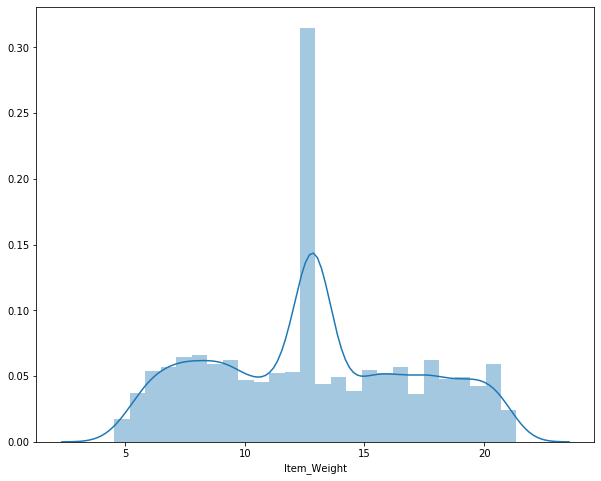

In [603]:
plt.figure(figsize=(10,8))
sns.distplot(data['Item_Weight'])
plt.show()

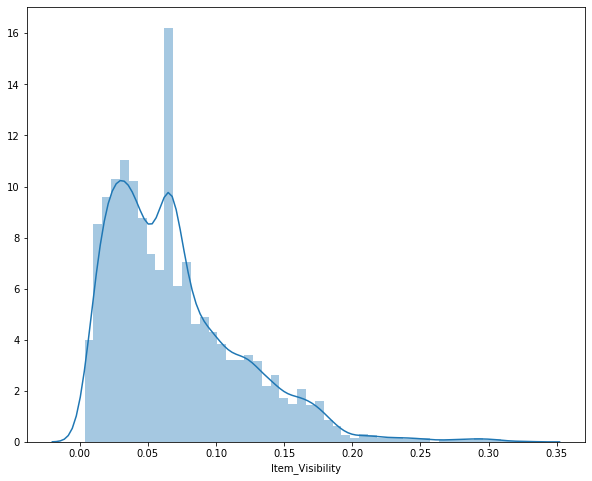

In [604]:
plt.figure(figsize=(10,8))
sns.distplot(data['Item_Visibility'])
plt.show()

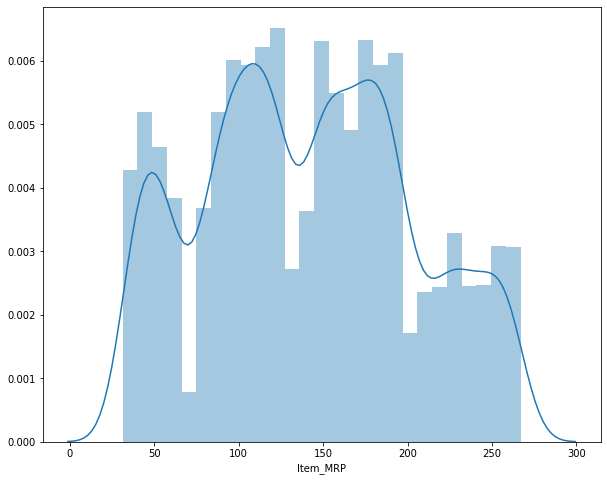

In [605]:
plt.figure(figsize=(10,8))
sns.distplot(data['Item_MRP'])
plt.show()

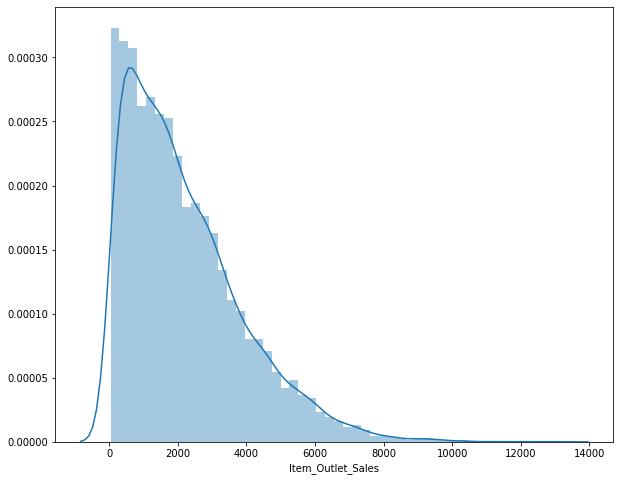

In [606]:
plt.figure(figsize=(10,8))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()  # sales is left skewed. 

In [607]:
# log transformation / simplifying the value of sales
data['Item_Outlet_Sales'] = np.log(1+data['Item_Outlet_Sales'])

In [608]:
#data['Item_Outlet_Sales'] = (data['Item_Outlet_Sales'] - data['Item_Outlet_Sales'].mean()) / data['Item_Outlet_Sales'].std()

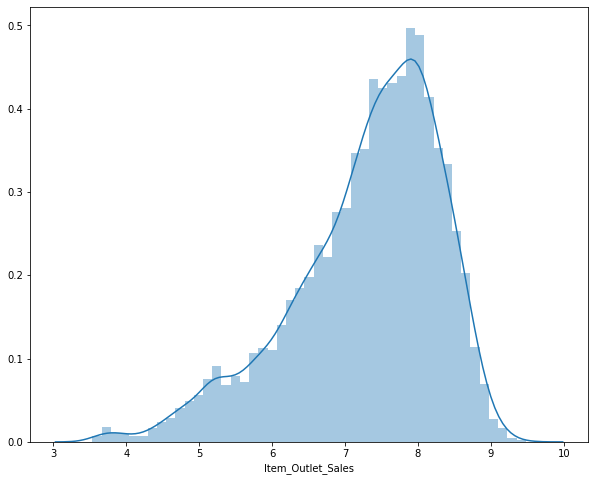

In [609]:
plt.figure(figsize=(10,8))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

# Catagorical variables EDA

In [610]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
New_item_type                 object
Outlet_years                   int64
dtype: object

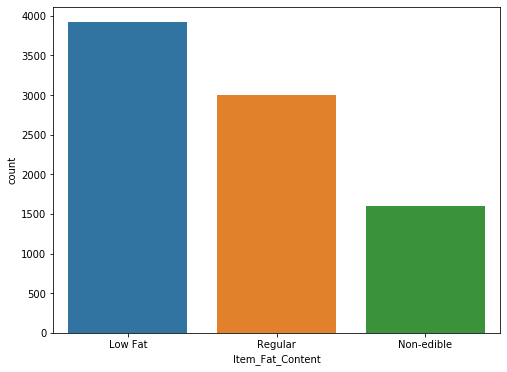

In [611]:
plt.figure(figsize=(8,6))
sns.countplot(data['Item_Fat_Content'])
plt.show()

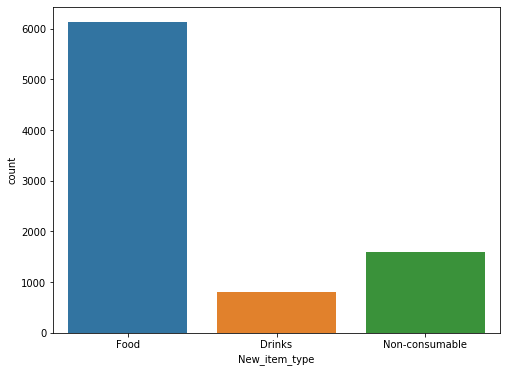

In [612]:
plt.figure(figsize=(8,6))
sns.countplot(data['New_item_type'])
plt.show()

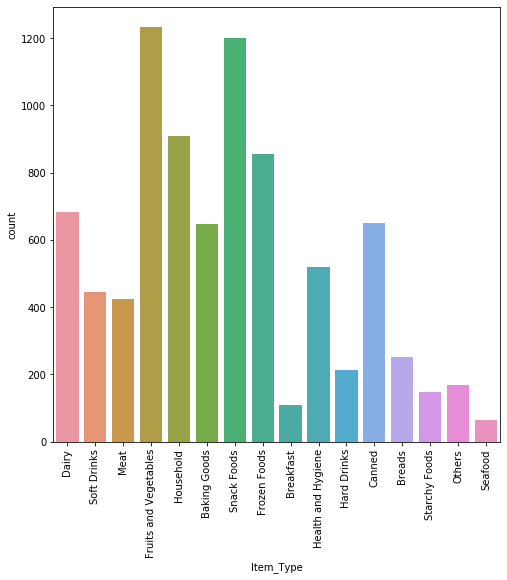

In [613]:
plt.figure(figsize=(8,8))
l = list(data['Item_Type'].unique())
chart=sns.countplot(data['Item_Type'])
chart.set_xticklabels(labels= l, rotation=90)
plt.show()

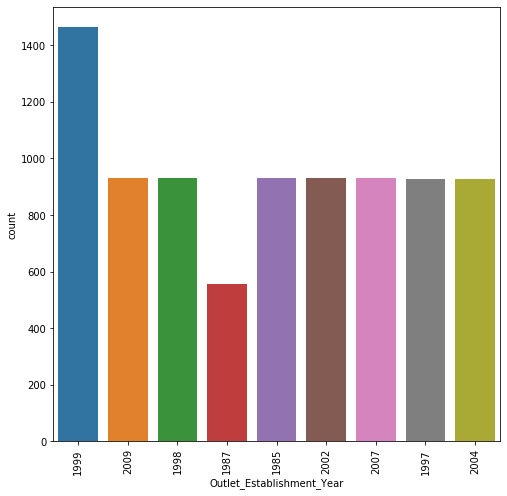

In [614]:
plt.figure(figsize=(8,8))
l = list(data['Outlet_Establishment_Year'].unique())
chart=sns.countplot(data['Outlet_Establishment_Year'])
chart.set_xticklabels(labels= l, rotation=90)
plt.show()

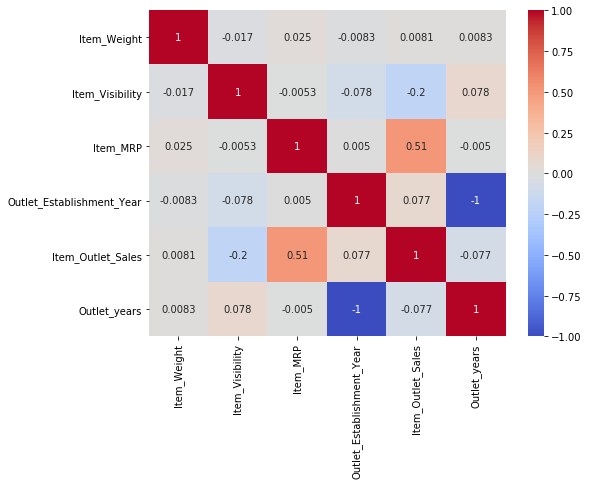

In [615]:
# correlation
plt.figure(figsize=(8,6))
corr = data.corr()
sns.heatmap(corr, annot= True, cmap= 'coolwarm')
plt.show()

In [616]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,22
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,23
4,NCD19,8.93,Non-edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-consumable,34


# One hot Encoding

In [617]:
df = pd.get_dummies(data,columns= ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_item_type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_item_type_Drinks,New_item_type_Food,New_item_type_Non-consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,8.225808,22,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,6.096776,12,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,7.648868,22,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,6.597664,23,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,6.903451,34,0,...,0,0,1,0,1,0,0,0,0,1


In [618]:
# lebal encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Outlet"] = le.fit_transform(data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','New_item_type']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

# split the data

In [626]:
X = data.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

In [627]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_item_type,Outlet_years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,1,22,9
1,5.92,2,0.019278,14,48.2692,1,2,2,0,12,3
2,17.50,0,0.016760,10,141.6180,1,0,1,1,22,9
3,19.20,2,0.066132,6,182.0950,2,2,0,1,23,0
4,8.93,1,0.066132,9,53.8614,0,2,1,2,34,1


# Train Test split

In [628]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

# Train model 

In [629]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model,x,y):
    #train data
    model.fit(x,y)

    pred = model.predict(X)
    # peforming cross valitation
    cv_score = cross_val_score(model,x,y, scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print('Model report')
    print('cv_score',cv_score)

# Model coeficient

Model report
cv_score 0.4255529164844476


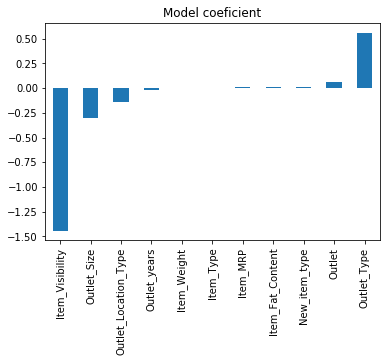

In [630]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
model = LinearRegression(normalize=True)
train(model,X_train,y_train)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind="bar",title='Model coeficient')

Model report
cv_score 1.0206434065523833


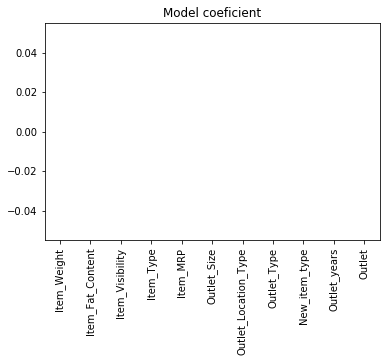

In [631]:
model = Lasso(normalize=True)
train(model,X_train,y_train)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind="bar",title='Model coeficient')

Model report
cv_score 0.5640535266929635


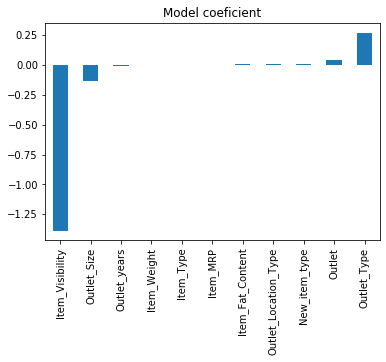

In [632]:
model = Ridge(normalize= True)
train(model,X_train,y_train)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind="bar",title='Model coeficient')

# Feature selections

Model report
cv_score 0.5409719087367881


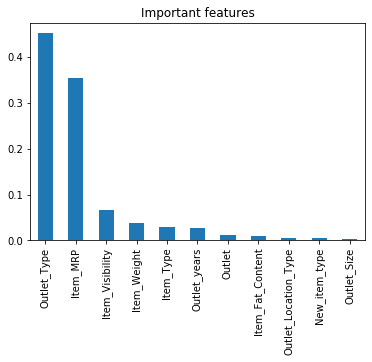

In [633]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train,y_train)
feature = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
feature.plot(kind='bar',title='Important features')

Model report
cv_score 0.2983923736862951


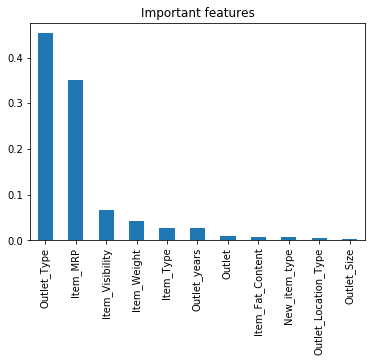

In [634]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X_train,y_train)
feature = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
feature.plot(kind='bar',title='Important features')

Model report
cv_score 0.32097578322755754


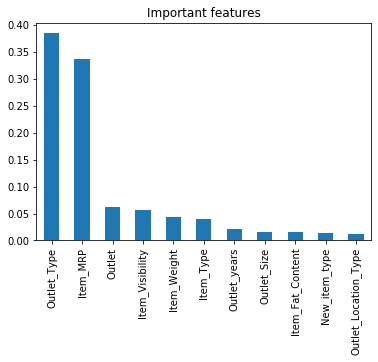

In [635]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X_train,y_train)
feature = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
feature.plot(kind='bar',title='Important features')

In [636]:
!pip install lightgbm

Model report
cv_score 0.2806280617274567


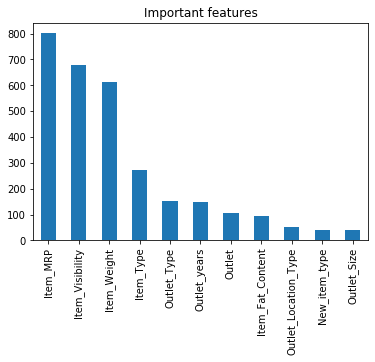

In [643]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model,X_train,y_train)
feature = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
feature.plot(kind='bar',title='Important features')

Model report
cv_score 0.3104312292737018


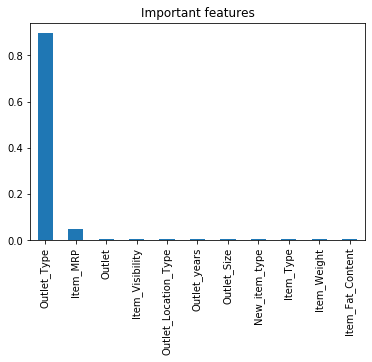

In [644]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model,X_train,y_train)
feature = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
feature.plot(kind='bar',title='Important features')

# Hyperparameter Tuning

In [645]:
from sklearn.model_selection import RandomizedSearchCV

# Rendom Forest Regressor

In [652]:
 #Randomized Search CV

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [653]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [654]:
rf = RandomForestRegressor()

In [655]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.5s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.3s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] min_samples_split=5, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [656]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)

{'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.26892360767259155


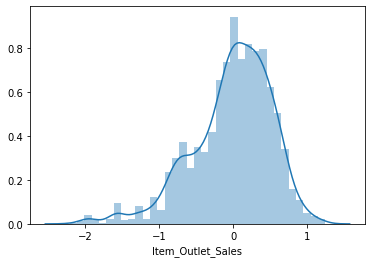

In [657]:
sns.distplot(y_test-predictions)